# Importing all the moduls which I needed for the model building 


In [6]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import imblearn

# Reading the data 

In [246]:
phishing = pd.read_csv(r'C:\Users\raja.tiwari\Desktop\Datasets\TechGig\Phising_Training_Dataset.csv')
test_phishing = pd.read_csv(r'C:\Users\raja.tiwari\Desktop\Datasets\TechGig\Phising_Testing_Dataset.csv')

# Checking for the Null Values 

In [3]:
phishing.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

# Droping the unique key columns which Brings us no information 

In [247]:
phishing.drop('key',axis=1,inplace=True)
test_phishing.drop('key',axis=1,inplace = True)


# Visualizing Data by every Feature to Find the pattern of the data

In [397]:
def plot_corr(df,size=20):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    


1.0

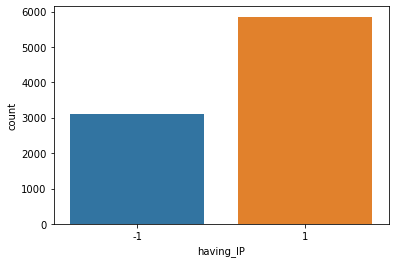

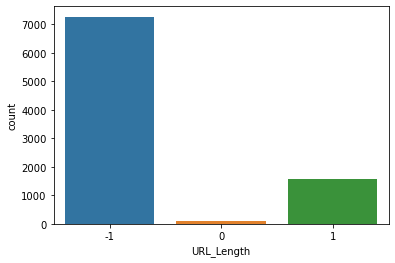

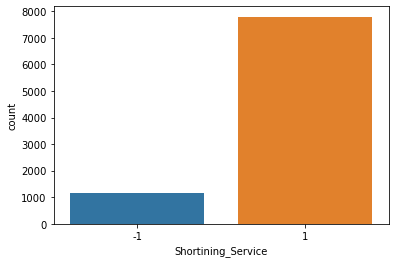

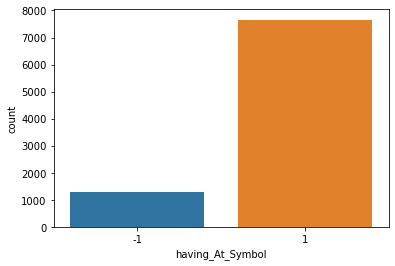

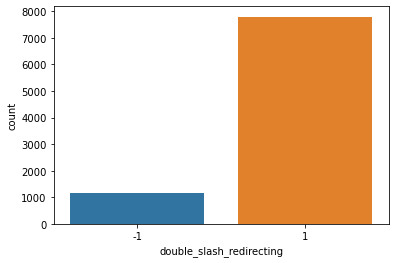

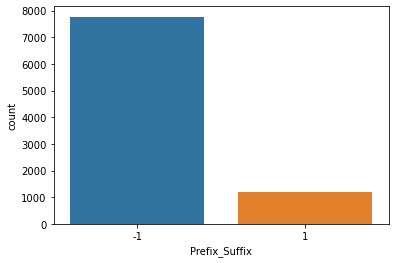

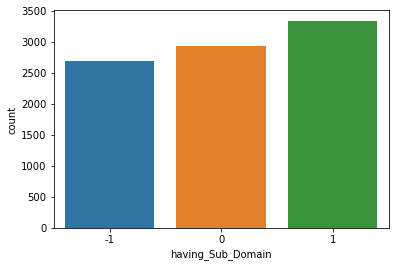

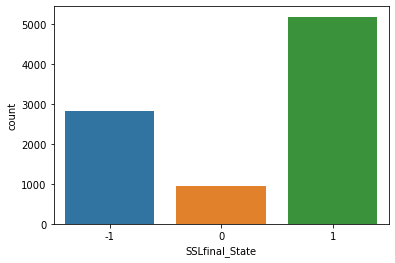

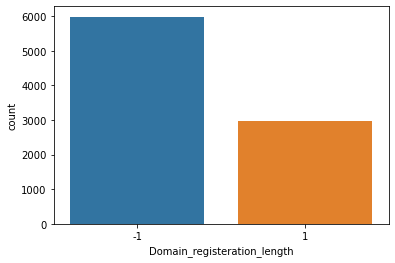

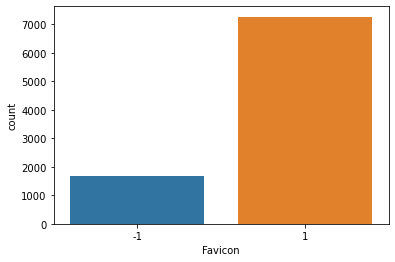

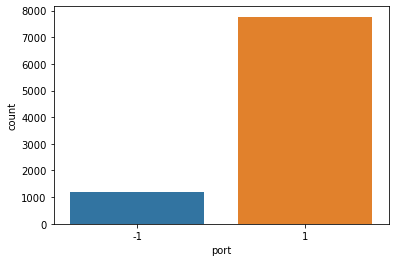

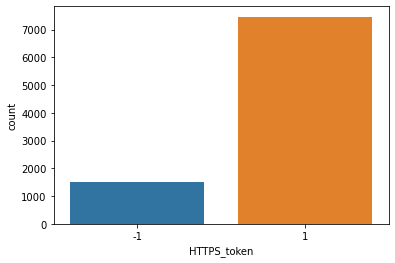

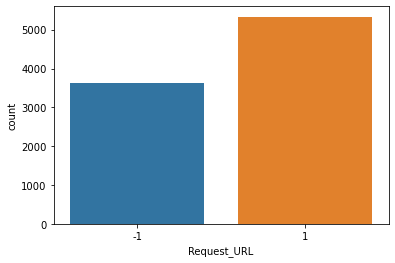

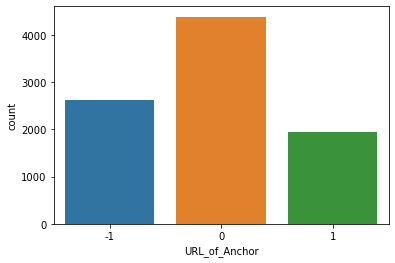

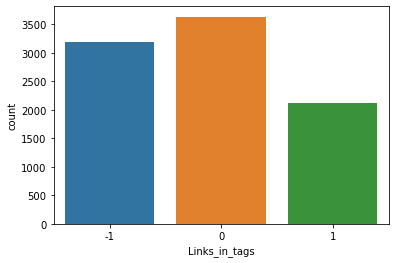

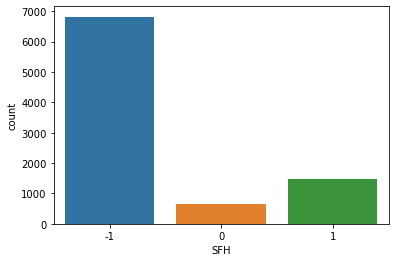

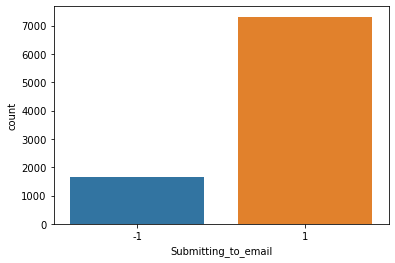

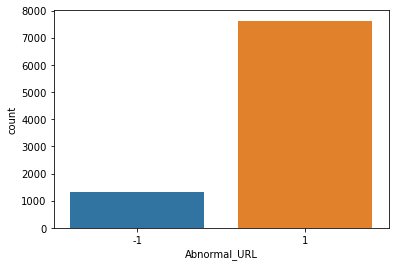

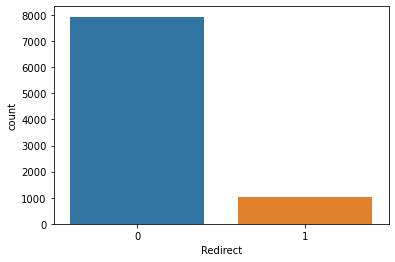

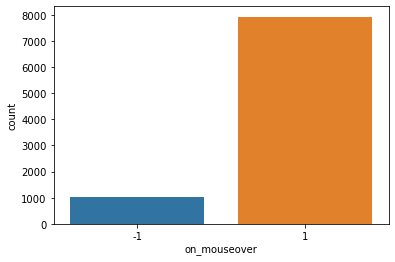

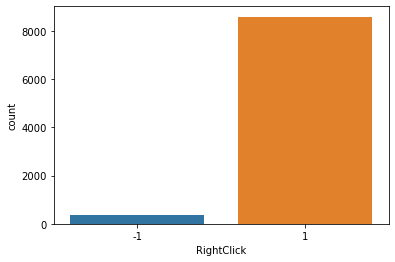

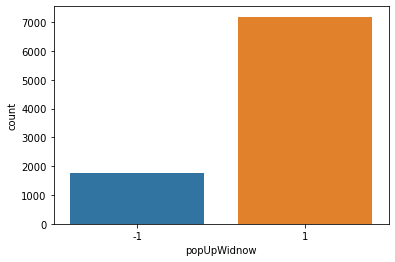

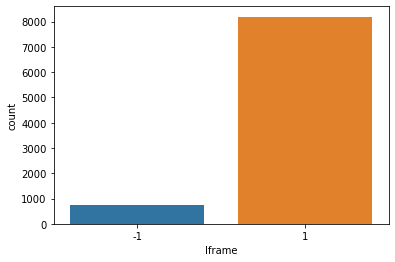

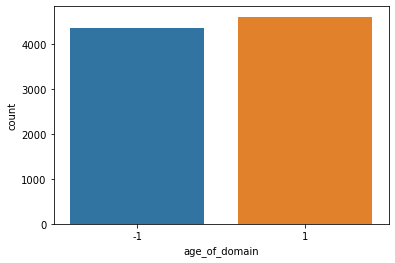

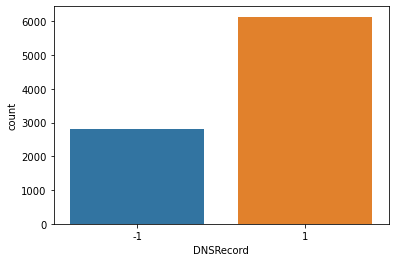

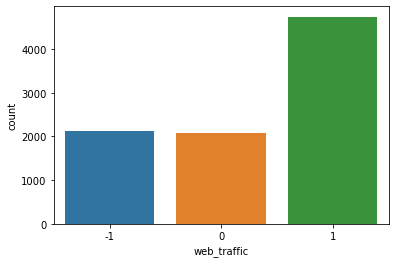

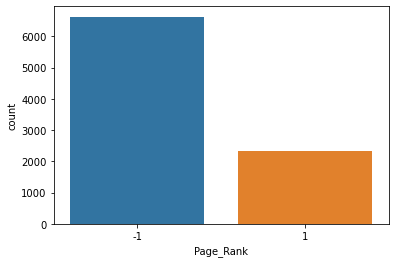

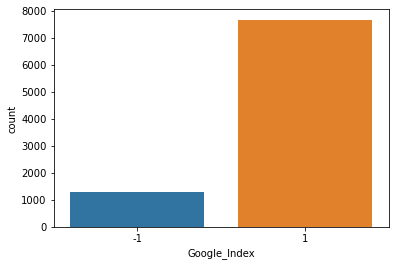

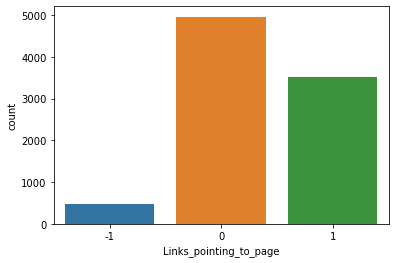

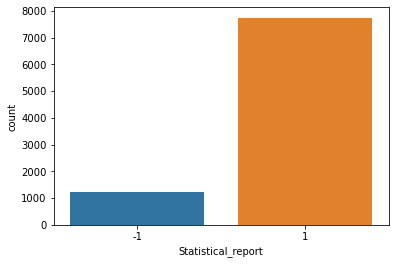

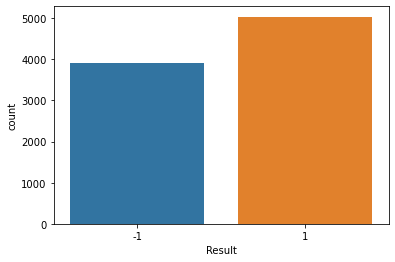

In [106]:
for i in phishing.columns:
    sns.countplot(x=i,data=phishing)
    plt.show()

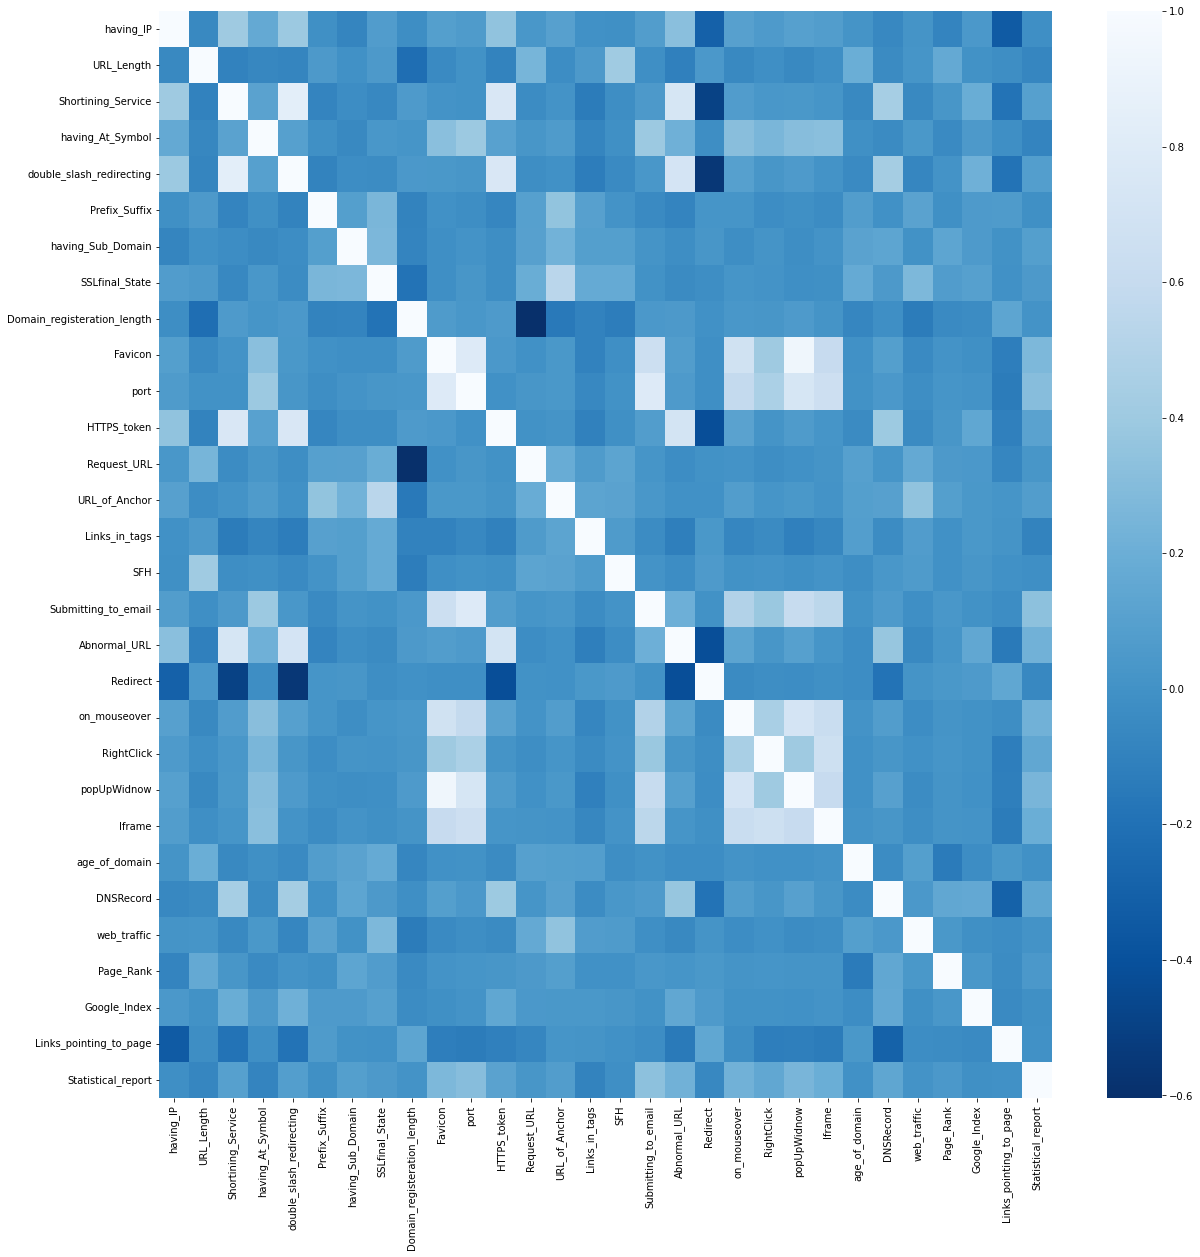

In [10]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(phishing.iloc[:,:-1].corr(),cmap = plt.cm.Blues_r)
plt.show()

# Feature Engineering 

In [77]:
y_phi.value_counts()

 1    5034
-1    3921
Name: Result, dtype: int64

In [222]:
y_phi = phishing.iloc[:,-1]

In [223]:
x_phi = phishing.iloc[:,:-1]
len(x_phi.columns)

30

In [ ]:
def remove_high_corr(df,threshold):
    corr_mat = df.corr().abs()
    upper = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df[to_drop]
X = x_phi.drop(remove_high_corr(x_phi,0.8),axis=1)

In [74]:
len(x_phi.columns)

31

# RandomForest  

In [224]:

X_train,X_test,y_train,y_test = train_test_split(x_phi,y_phi,test_size=0.2,random_state=12,stratify=y_phi)


In [149]:
len(X_train.columns)

30

<BarContainer object of 30 artists>

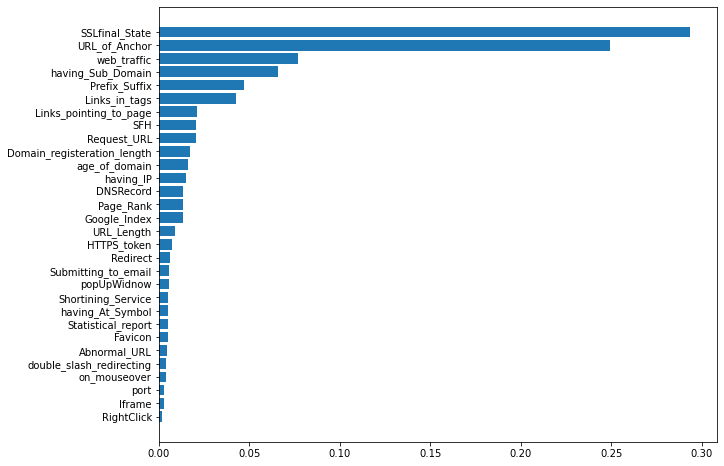

In [79]:
model = RandomForestClassifier(criterion= 'gini',max_depth=20,max_features='log2',n_estimators=80,l1_ratio = )
model.fit(x_phi,y_phi)
fig = plt.figure(figsize=(10,8))
one = list(zip(x_phi.columns,model.feature_importances_))
one.sort(key=lambda x: x[1])
plt.barh([x[0] for x in one],[x[1] for x in one])


In [18]:
params_dist = {'n_estimators':[70,80,100,110,120,150,200],
              'criterion':['gini'],
              'max_depth':[15,16,17,18,19,20,21,22],
               "max_features":['sqrt','log2'], 
              }

In [19]:
rfc_cv = GridSearchCV(model,params_dist,cv=5,n_jobs=-1)
rfc_cv.fit(x_phi,y_phi)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features='log2',
                                              n_estimators=80),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [15, 16, 17, 18, 19, 20, 21, 22],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [80]})

In [20]:
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'log2',
 'n_estimators': 80}

In [592]:
rfc_cv.best_score_

0.9663874930206588

In [22]:
rfe =  RFECV(model,cv=5,scoring='roc_auc',n_jobs=-1)
rfe.fit(x_phi,y_phi)


RFECV(cv=5,
      estimator=RandomForestClassifier(max_depth=20, max_features='log2',
                                       n_estimators=80),
      n_jobs=-1, scoring='roc_auc')

In [23]:
x_phi= x_phi[x_phi.columns[rfe.get_support()]]
x_phi.shape


(8955, 30)

In [110]:
model.score(X_test,y_test)

0.9905080960357342

In [ ]:
classification_report(y_test,y_pred)

# Lightgbm 


In [248]:
model_para = {   'objective':['binary'],
              #'boosting':['rf'],
                'learning_rate': [0.4,0.5,0.6],                
                'n_estimators': [60,70,80,90]}

In [239]:
model_lgbm = LGBMClassifier()
# rfe_lgbm =  RFECV(model_lgbm,cv=5,scoring='accuracy',n_jobs=-1)
# rfe_lgbm.fit(X_train,y_train)
# model_lgbm.fit(X_train,y_train)
# model_lgbm.score(X_test,y_test)


RFECV(cv=5, estimator=LGBMClassifier(), n_jobs=-1, scoring='accuracy')

In [240]:
x_phi = x_phi[x_phi.columns[rfe_lgbm.get_support()]]

In [249]:
X_train,X_test,y_train,y_test = train_test_split(x_phi,y_phi,test_size=0.2,random_state=123,stratify=y_phi)

In [250]:
grid_lgbm = GridSearchCV(model_lgbm,model_para,cv=5,n_jobs=-1)

In [251]:
grid_lgbm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.5, 0.6],
                         'n_estimators': [60, 70, 80, 90],
                         'objective': ['binary']})

In [252]:
grid_lgbm.best_score_

0.9645456069425006

In [253]:
grid_lgbm.best_params_

{'learning_rate': 0.5, 'n_estimators': 60, 'objective': 'binary'}

In [ ]:
classification_report(y_test,y_pred)

# XGBClassifier 

In [80]:
y_phi.loc[y_phi == 1] = 0

In [83]:
y_phi.loc[y_phi == -1] = 1

In [86]:
X_train,X_test,y_train,y_test = train_test_split(x_phi,y_phi,test_size=0.2,random_state=12,stratify=y_phi)


In [91]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label = y_test)


In [89]:
model_xgb = XGBClassifier(objective='binary:logistic',eval_matric = 'gbtree')

model_xgb.fit(X_train,y_train)
model_xgb.score(X_test,y_test)



[17:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9670575097710776

In [134]:
params = {'booster':['gbtree'],'objective':['binary:logistic'],'max_depth':[4,5,6,7,8,9,10],'eta':[0.1,0.2,0.3],'n_estimators':[80,100,120,130,140]}

In [149]:
xgb_cv = GridSearchCV(model_xgb,params,cv=5,n_jobs=-1)

In [150]:
xgb_cv.fit(X_train,y_train)

[18:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [151]:
xgb_cv.score(X_test,y_test)

0.9676158570630933

In [152]:
xgb_cv.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 7,
 'n_estimators': 140,
 'objective': 'binary:logistic'}

In [95]:
xgb = XGBClassifier(booster='gbtree',eta=0.1,max_depth=7,n_estimators=140,obejctive='binary:logistic',reg_alpha=0.9)

In [96]:
params  = {'booster': ['gbtree'],
 'eta':[ 0.1],
 'max_depth':[ 7],
 'n_estimators': [140],
 'objective': ['binary:logistic'],
'reg_alpha':[0,0.1,0.3,0.5,0.7,0.9],
}

In [97]:
gscv = GridSearchCV(xgb,params,cv=5,n_jobs=-1)

In [99]:
gscv.fit(X_train,y_train)


[01:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obejctive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, eta=0.1,
                                     gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     obejctive='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=0.9, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'eta': [0.1], 'max_depth': [7],
                         'n_estimators': [140],
                         'objective': ['binary:logistic'],
                         'reg_alpha': [0, 0.1, 0.3, 0.5, 0.7, 0.9]})

In [185]:
gscv.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 7,
 'n_estimators': 140,
 'objective': 'binary:logistic',
 'reg_alpha': 0.1}

In [103]:
xgb2 = XGBClassifier(booster ='gbtree',\
 eta = 0.1,\
 max_depth =  7,\
 n_estimators = 140,\
 objective = 'binary:logistic',\
reg_alpha = 0.1)
xgb2.fit(x_phi,y_phi)
xgb2.score(X_test,y_test)

[01:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.983249581239531

In [ ]:
classification_report(y_test,y_pred)



# Model Building 

In [94]:
model2 = XGBClassifier(booster='gbtree',eta=0.1,max_depth=7,n_estimators=140,obejctive='binary:logistic',reg_alpha=0.9)
model2.fit(x_phi,y_phi)
y_pred2 = model2.predict(X_test)
accuracy_score(y_test,y_pred2)


[01:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obejctive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9804578447794529

In [24]:
model.fit(X_train,y_train)
y_pred  = model.predict(X_test)


In [25]:
accuracy_score(y_test,y_pred)

0.9720826353992184

In [45]:
from sklearn.metrics import classification_report 
y_pred2 = model.predict(X_train)

In [46]:
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      3137
           1       0.99      1.00      0.99      4027

    accuracy                           0.99      7164
   macro avg       0.99      0.99      0.99      7164
weighted avg       0.99      0.99      0.99      7164



In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       784
           1       0.97      0.98      0.98      1007

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



In [81]:
test_phishing = pd.read_csv(r'C:\Users\raja.tiwari\Desktop\Datasets\TechGig\Phising_Testing_Dataset.csv')

submit = pd.DataFrame()

submit['key'] = test_phishing['key']
test_phishing.drop('key',inplace=True,axis=1)

test_phishing.shape


(2100, 30)

In [616]:
final = test_phishing[test_phishing.columns[rfe.get_support()]]



In [83]:
submit['Result'] = pd.DataFrame(model.predict(test_phishing))


In [84]:
submit

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [85]:
submit.reset_index(drop=True,inplace=True)

In [86]:
submit.index = submit.key
submit.drop('key',inplace=True,axis=1)

In [90]:
submit.to_csv(r'C:\Users\raja.tiwari\Desktop\Datasets\TechGig\Phishing_Sample_Submission10.csv')

In [88]:
submit

,Result
key,
21338,1
21339,-1
21340,-1
21341,-1
21342,1
...,...
23433,1
23434,1
23435,-1


In [10]:
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns 

In [11]:
data  = pd.read_csv(r'Downloads\train.csv')

<AxesSubplot:xlabel='x', ylabel='y'>

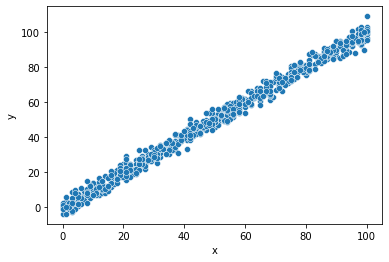

In [13]:
sns.scatterplot(x= 'x',y='y',data=data)